In [ ]:
# Copyright (c) Opendatalab. All rights reserved.
import os




### `Making a Dataset Instance for a pdf`

In [ ]:
from magic_pdf.data.data_reader_writer import FileBasedDataReader
from magic_pdf.data.dataset import PymuDocDataset
# args
pdf_file_name = "demo1.pdf" 

# read bytes
reader1 = FileBasedDataReader("")
pdf_bytes = reader1.read(pdf_file_name)  # read the pdf content

# proc
## Create Dataset Instance
ds = PymuDocDataset(pdf_bytes)

2025-04-07 19:37:16.985 | INFO     | magic_pdf.data.dataset:__init__:157 - lang: None


##### `rf. Exploring PymuDocDataset`

In [6]:
page_data = ds.get_page(3)
img_dict = page_data.get_image()
img = img_dict['img']
page_width = img_dict['width']
page_height = img_dict['height']

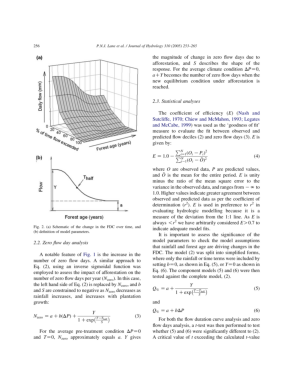

In [7]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

In [ ]:
## inference
if ds.classify() == SupportedPdfParseMethod.OCR:
    infer_result = ds.apply(doc_analyze, ocr=True)

    ## pipeline
    pipe_result = infer_result.pipe_ocr_mode(image_writer)

else:
    infer_result = ds.apply(doc_analyze, ocr=False)

    ## pipeline
    pipe_result = infer_result.pipe_txt_mode(image_writer)

In [9]:
# Copyright (c) Opendatalab. All rights reserved.
import os

from magic_pdf.data.data_reader_writer import FileBasedDataWriter, FileBasedDataReader
from magic_pdf.data.dataset import PymuDocDataset
from magic_pdf.model.doc_analyze_by_custom_model import doc_analyze
from magic_pdf.config.enums import SupportedPdfParseMethod

# args
pdf_file_name = "demo3.pdf"  # replace with the real pdf path
name_without_suff = pdf_file_name.split(".")[0]

# prepare env
local_image_dir, local_md_dir = "output/images", "output"
image_dir = str(os.path.basename(local_image_dir))

os.makedirs(local_image_dir, exist_ok=True)

image_writer, md_writer = FileBasedDataWriter(local_image_dir), FileBasedDataWriter(
    local_md_dir
)

# read bytes
reader1 = FileBasedDataReader("")
pdf_bytes = reader1.read(pdf_file_name)  # read the pdf content

# proc
## Create Dataset Instance
ds = PymuDocDataset(pdf_bytes)

## inference
if ds.classify() == SupportedPdfParseMethod.OCR:
    infer_result = ds.apply(doc_analyze, ocr=True, lang="korean")

    ## pipeline
    pipe_result = infer_result.pipe_ocr_mode(image_writer)

else:
    infer_result = ds.apply(doc_analyze, ocr=False, lang="korean")

    ## pipeline
    pipe_result = infer_result.pipe_txt_mode(image_writer)

### draw model result on each page
infer_result.draw_model(os.path.join(local_md_dir, f"{name_without_suff}_model.pdf"))

### get model inference result
model_inference_result = infer_result.get_infer_res()

### draw layout result on each page
pipe_result.draw_layout(os.path.join(local_md_dir, f"{name_without_suff}_layout.pdf"))

### draw spans result on each page
pipe_result.draw_span(os.path.join(local_md_dir, f"{name_without_suff}_spans.pdf"))

### get markdown content
md_content = pipe_result.get_markdown(image_dir)

### dump markdown
pipe_result.dump_md(md_writer, f"{name_without_suff}.md", image_dir)

### get content list content
content_list_content = pipe_result.get_content_list(image_dir)

### dump content list
pipe_result.dump_content_list(md_writer, f"{name_without_suff}_content_list.json", image_dir)

### get middle json
middle_json_content = pipe_result.get_middle_json()

### dump middle json
pipe_result.dump_middle_json(md_writer, f'{name_without_suff}_middle.json')

2025-04-07 19:54:45.058 | INFO     | magic_pdf.data.dataset:__init__:157 - lang: None
2025-04-07 19:54:45.638 | INFO     | magic_pdf.libs.pdf_check:detect_invalid_chars:67 - cid_count: 0, text_len: 5822, cid_chars_radio: 0.0
2025-04-07 19:54:45.854 | INFO     | magic_pdf.model.pdf_extract_kit:__init__:68 - DocAnalysis init, this may take some times, layout_model: doclayout_yolo, apply_formula: True, apply_ocr: False, apply_table: True, table_model: rapid_table, lang: korean
2025-04-07 19:54:45.855 | INFO     | magic_pdf.model.pdf_extract_kit:__init__:82 - using device: cpu
2025-04-07 19:54:45.855 | INFO     | magic_pdf.model.pdf_extract_kit:__init__:86 - using models_dir: /home/zerothweek/.cache/huggingface/hub/models--opendatalab--PDF-Extract-Kit-1.0/snapshots/3319225f67586ce2b4c9a766eda5d4d10c91a39f/models
2025-04-07 19:54:46,316 - DownloadModel - DEBUG: /home/zerothweek/miniconda3/envs/pdf2md/lib/python3.11/site-packages/rapid_table/models/slanet-plus.onnx already exists
2025-04-07 

In [5]:
print(infer_result.get_infer_res())

[{'layout_dets': [{'category_id': 1, 'poly': [115, 910, 1385, 910, 1385, 1517, 115, 1517], 'score': 0.979}, {'category_id': 1, 'poly': [212, 621, 1288, 621, 1288, 732, 212, 732], 'score': 0.972}, {'category_id': 2, 'poly': [514, 192, 986, 192, 986, 291, 514, 291], 'score': 0.954}, {'category_id': 2, 'poly': [118, 198, 269, 198, 269, 369, 118, 369], 'score': 0.949}, {'category_id': 0, 'poly': [245, 471, 1257, 471, 1257, 521, 245, 521], 'score': 0.943}, {'category_id': 2, 'poly': [1160, 197, 1378, 197, 1378, 366, 1160, 366], 'score': 0.937}, {'category_id': 1, 'poly': [237, 551, 1255, 551, 1255, 597, 237, 597], 'score': 0.919}, {'category_id': 2, 'poly': [114, 1792, 778, 1792, 778, 1843, 114, 1843], 'score': 0.906}, {'category_id': 1, 'poly': [387, 749, 1109, 749, 1109, 775, 387, 775], 'score': 0.897}, {'category_id': 0, 'poly': [117, 862, 212, 862, 212, 889, 117, 889], 'score': 0.895}, {'category_id': 1, 'poly': [120, 1509, 542, 1509, 542, 1535, 120, 1535], 'score': 0.891}, {'category_i